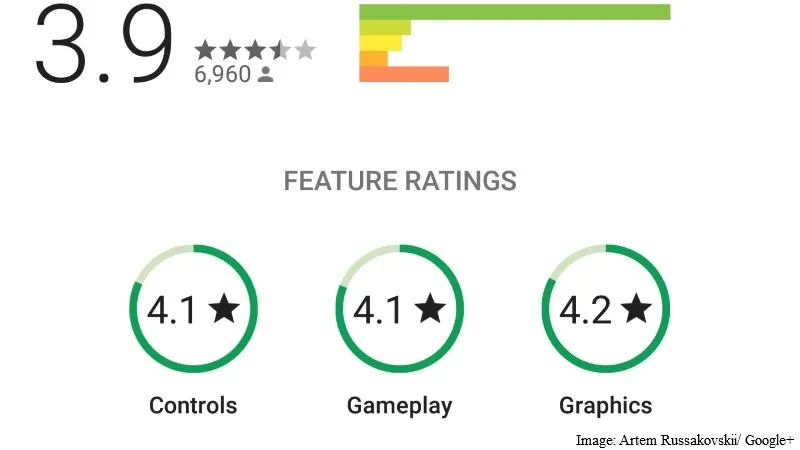

# 
    <d> In this lesson, we will cover the following concepts with the help of a business use case:

    Analysis

# Problem statement

Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential.


The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

# Dataset

    <d>Google Play Store data (googleplaystore.csv)

Variables     ---     	Description

App	          ---      Application name

Category	  ---      Category to which the app belongs

Rating	      ---      Overall user rating of the app

Reviews	     ---       Number of user reviews for the app

Size	     ----       Size of the app

Installs     ---      	Number of user downloads/installs for the app

Type	     ---       Paid or Free

Price	     ---       Price of the app

Content Rating	---    Age group the app is targeted at - Children / Mature 21+ / Adult

Genres	        ---    An app can belong to multiple genres (apart from its main category)
                    For example, a musical family game will belong to Music, Game, Family genres
                    
Last Updated	 ---   Date when the app was last updated on Play Store

Current Ver	     ---   Current version of the app available on Play Store

Android Ver	     ---   Minimum required Android version

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv('C:\\Users\\admin\\ABC New Environment all in one\\SIMPLI LEARN\\Regression\\googleplaystore.csv')

In [3]:
# checking first give rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# checking last five rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature_17+,Books_&_Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# EDA

In [5]:
# checking number of columns and rows
df.shape

(10841, 13)

In [6]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# checking missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

    <b>Dropping the record with null values
    <b>This is done because rating is our target valriable and if is null we cannot use that observation for training

In [8]:
df.dropna(inplace=True)

In [9]:
# The null values has got deleted.
print(df.isnull().sum())
print(df.shape)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
(9360, 13)


### Feature wise Cleanup, Preprocessing and Transformation

##### Price

In [10]:
# cleaning the Price column
df['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

Observations

some has $ and some has 0

* we need to conditionaly handle this
* First, Lets modify the column to take 0 if value is 0, else take the first letter onwords

In [11]:
# Modify the column by removing $ sign and convert into float

In [12]:
df["Price"] = df["Price"].apply(lambda x: str(x).replace('$', '') if x in str(x) else str(x))

In [13]:
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

In [14]:
# df["Price"].describe()
df["Price"].describe().round(2)

count    9360.00
mean        0.96
std        15.82
min         0.00
25%         0.00
50%         0.00
75%         0.00
max       400.00
Name: Price, dtype: float64

<!--  **The other columns with numeric are<b>**
    1. review
    2. install
    3. size
    
The values in this features have some alphanumeric characters due to which these features have been loaded as object data type
 -->

**The other columns with numeric data are:<br>**
1. Reviews
2. Installs
3. Size

However the format of the values in these features have some alphanumeric characters due to which these features have been loaded as object data type.

### Reviews

In [15]:
pd.options.display.max_rows = 20000

In [61]:
Rw_count = df["Reviews"].value_counts()
Rw_count.head()

2    81
3    78
5    74
4    73
1    67
Name: Reviews, dtype: int64

In [17]:
# converting Reviews to numeric
df["Reviews"] = df["Reviews"].astype("int32")   #to_numeric

In [59]:
Rw = df["Reviews"]
Rw.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32

In [19]:
df["Reviews"].describe().round(0)

count        9360.0
mean       514377.0
std       3145023.0
min             1.0
25%           187.0
50%          5955.0
75%         81628.0
max      78158306.0
Name: Reviews, dtype: float64

# Install

In [20]:
# handling the installed columns
df["Installs"].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

we need to remove sign like , and + and convert it into numerics. We will define a user define function for the same

In [21]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = pd.to_numeric(df["Installs"], errors='coerce')

In [22]:
df['Installs'].value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

To prevent display scientific  notaion eg 2.36e-3 etc

In [23]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 10000

In [57]:
size_count = df['Size'].value_counts()
size_count.head()

22970.46    1636
14000.00     165
12000.00     161
11000.00     159
15000.00     159
Name: Size, dtype: int64

In [25]:
# handling the  app size field to convert  values into  KB  by  checking for M or K

In [26]:
def change_size(size):
    if "M" in size:
        x = size[ :-1]
        x = float(x)*1000
        return (x)
    
    elif 'k' == size[-1: ]:
        x = size[ :-1]
        x = float(x)
        return (x)
    
    else:
        return None

In [27]:
df["Size"] = df["Size"].map(change_size)

In [28]:
df["Size"].describe().round(0)

count     7723.00
mean     22970.00
std      23450.00
min          8.00
25%       5300.00
50%      14000.00
75%      33000.00
max     100000.00
Name: Size, dtype: float64

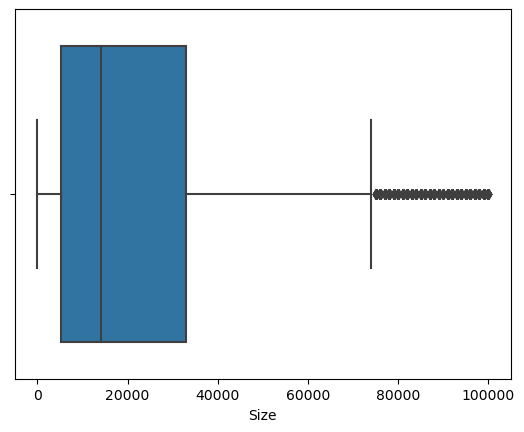

In [29]:
sns.boxplot (data=df, x='Size');

In [30]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content_Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

**Filling Size null values by mean**

In [31]:
df['Size'].fillna(df['Size'].mean(), inplace=True)

In [32]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [33]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [34]:
df.shape

(9360, 13)

# Sanity check

**average rating should be in 1 and 5, as only these values are allowed on Play Store.  Drop  any rows  thatthat have values in this range.**

In [35]:
# checking the rating
df['Rating'].describe()

count   9360.00
mean       4.19
std        0.52
min        1.00
25%        4.00
50%        4.30
75%        4.50
max        5.00
Name: Rating, dtype: float64

**Min is 1 and max is 5.  None of the values have rating  outside  the side the range
Reviews should not be more than installed apps as only those who installed  can  review the capp
checking if reviews are more than installed**

In [55]:
RI = df['Reviews']>df['Installs']
RI.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [37]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.00,4,25000.00,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.80,10249,22970.46,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.00,2,20000.00,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.00,7,19000.00,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.00,11,6100.00,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.00,20,4200.00,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.00,2,16000.00,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


Drops such apps where Reviews are less than Installed.

In [38]:
df = df[df.Reviews <= df.Installs]

In [39]:
df.shape

(9353, 13)

For free apps **(Type=="Free")**, the Price  should  no be **>0**.  Drop such rows.

In [53]:
TP = (df["Type"]=="Free") & (df['Price']>0)
TP.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [41]:
len(df[(df.Type=='Free') & (df.Price>0)])

0

# Univariate analysis

### Price

In [42]:
df['Price'].describe().round(0)

count   9353.00
mean       1.00
std       16.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      400.00
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

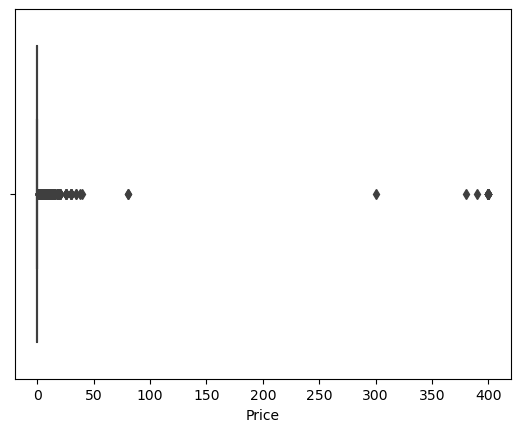

In [43]:
sns.boxplot(data=df, x='Price')

### Reviews

**Are there any apps with very  high number of eviews? Do the values seem right** 

<AxesSubplot:xlabel='Reviews'>

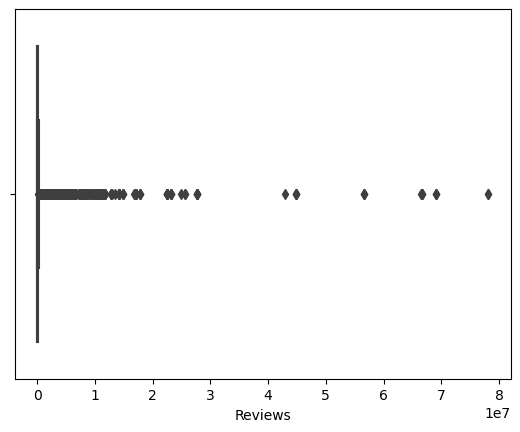

In [44]:
sns.boxplot(data=df, x='Reviews')

In [45]:
df['Reviews'].describe()

count       9353.00
mean      514760.58
std      3146168.75
min            1.00
25%          187.00
50%         5967.00
75%        81747.00
max     78158306.00
Name: Reviews, dtype: float64

### Rating

**Distribution of the rating feature**

<AxesSubplot:xlabel='Rating', ylabel='Count'>

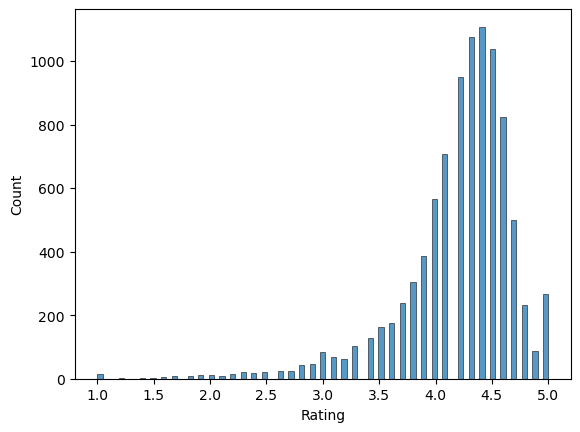

In [46]:
sns.histplot(data=df, x='Rating')

# Size

<AxesSubplot:xlabel='Size', ylabel='Count'>

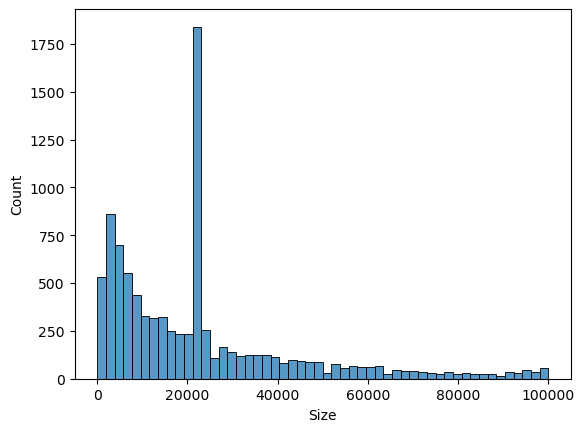

In [47]:
sns.histplot(data=df, x='Size')

#### This data took from SimpliLearn online data science institude.
Image is downloaded form Google.